# Graphing Monthly Net Return Data

In [494]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.mlab import GaussianKDE
from matplotlib.ticker import FormatStrFormatter

In [495]:
col = 'Returns'
df = pd.read_csv('long biased monthly net returns.csv')[col]

In [496]:
# get data statistics
r_mean = df.mean()
r_median = df.median()
r_range = (df.min(), df.max())
r_std = df.std()
r_skew = df.skew()
r_kurt = df.kurtosis()

In [497]:
# print statistics of data
print(f'Mean: {round(r_mean, 4)}')
print(f'Median: {round(r_median, 4)}')
print(f'Range: {r_range}')
print(f'Standard deviation: {round(r_std, 4)}')
print(f'Skew: {round(r_skew, 4)}')
print(f'Kurtosis: {round(r_kurt, 4)}')

Mean: 1.4598
Median: 1.42
Range: (-25.16, 25.81)
Standard deviation: 7.1894
Skew: -0.1915
Kurtosis: 2.103


In [498]:
# get kernel density estimate (KDE)
kde = GaussianKDE(df)

In [499]:
# setting bins and the labels
bins = list(range(-26, 27, 2))
bin_labels = list(range(-24, 25, 4))

In [501]:
# reset from density to accurate frequency sizes
y_axis = (0, 5, 10, 15, 20, 25)
y_pos = [0, 0.016, 0.016*2, 0.016*3, 0.016*4, 0.016*5]

C:\Users\oliver\AppData\Local\Temp\ipykernel_13584\2891714162.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


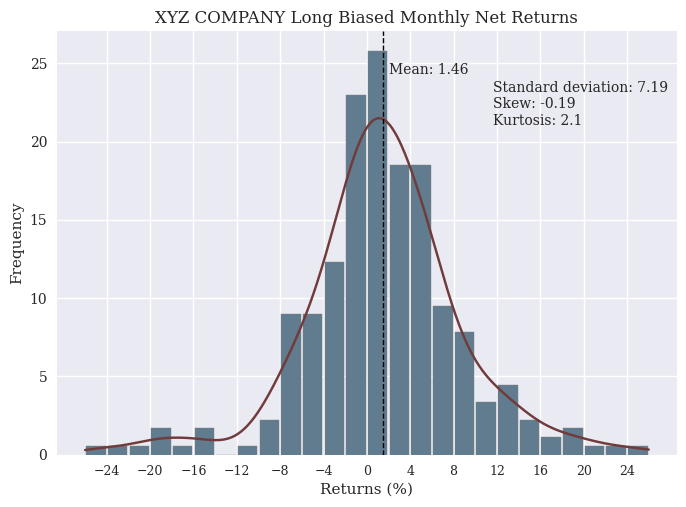

In [502]:
# style like seaborn
plt.style.use('seaborn')

# change font family
plt.rcParams["font.family"] = "serif"

# create histogram plot
fig, ax = plt.subplots()
ax.hist(x=df, bins=bins, rwidth=0.9, density=True, color='#607c8e', edgecolor='gray')

# create kernel density estimate (KDE) plot
xx = np.linspace(-26, 26, 500)
ax.plot(xx, kde(xx), color='#713B3B')

# add extra info about data
plt.figtext(.67, .77, f'Standard deviation: {round(r_std, 2)}')
plt.figtext(.67, .74, f'Skew: {round(r_skew, 2)}')
plt.figtext(.67, .71, f'Kurtosis: {round(r_kurt, 2)}')

# line for mean
plt.axvline(r_mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(r_mean*1.4, max_ylim*0.9, 'Mean: {:.2f}'.format(r_mean))

# add labels
plt.title('XYZ COMPANY Long Biased Monthly Net Returns')
plt.ylabel('Frequency')
plt.xlabel('Returns (%)')

# reformat x and y axes
plt.yticks(y_pos, y_axis)
ax.set_xticks(bin_labels)
plt.xticks(fontsize=9)

# save as png
plt.savefig('Long Biased Monthly Net Returns.png', dpi=150)